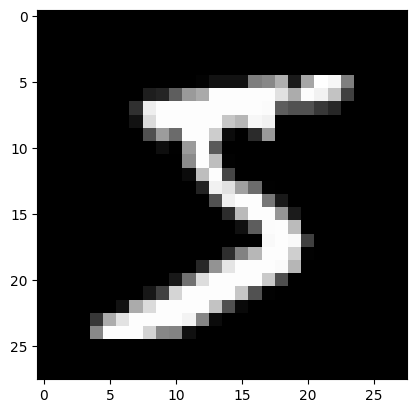

In [15]:
# import Keras dataset
from keras.datasets import mnist

# load dataset
(X_train, _), (X_test, _) = mnist.load_data()


X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))

# plot the first image in the dataset
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Reshape, UpSampling2D

class Encoder():
    def __init__(self, in_shape=(28,28,1)):
        self.model = Sequential()
        self.model.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=in_shape))
        self.model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
        self.model.add(Flatten())
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(32, activation='relu'))
        self.model.summary()

In [17]:
class Decoder():
    def __init__(self, in_shape=(32,)) -> None:
        self.model = Sequential()
        self.model.add(Dense(32, activation='relu'))
        self.model.add(Dense(128, activation='relu'))
        self.model.add(Dense(784, activation='sigmoid'))
        self.model.add(Reshape((28,28,1)))

In [18]:
class EncoderDecorder():
    def __init__(self, encoder, decoder) -> None:
        self.encoder = encoder
        self.decoder = decoder
        self.model = Sequential()
        self.model.add(self.encoder.model)
        self.model.add(self.decoder.model)
        self.model.summary()
        self.model.compile(loss="mse", optimizer='adam', metrics=['accuracy'])

    def train(self, X, y, epochs=3, batch_size=128):
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size)

    def plotAllImage(self, X):
        fakeData = self.model.predict(X)
        for i in range(len(X)):
            plt.axis('off')
            plt.imshow(fakeData[i], cmap='gray')
        plt.show()



In [19]:

encoder = Encoder()
decoder = Decoder()
encoder_decoder = EncoderDecorder(encoder, decoder)

history = encoder_decoder.train(X_train[:100], X_train[:100], epochs=300, batch_size=128)

encoder_decoder.plotAllImage(X_train[:10])
        

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_30 (Dense)            (None, 128)               3211392   
                                                                 
 dense_31 (Dense)            (None, 32)                4128      
                                                                 
Total params: 3,220,320
Trainable params: 3,220,320
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_20"
____________________

ValueError: Number of rows must be a positive integer, not 5.0

<Figure size 640x480 with 0 Axes>